In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=4a3e6895a74991531efb55ef6e84ab92662cada45ad52be4bb774963ff3771a1
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
from pyspark import SparkConf

#conf = SparkConf().set("spark.driver.memory", "8g").set("spark.executor.memory", "16g")
spark = SparkSession.builder.appName("application").getOrCreate()

In [ ]:
#récupérer la dataset 
data = spark.read.format("csv").option("header", "true").load("/content/creditcarddata (1).csv")

In [ ]:
data.show(3)

+----+--------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type| amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|  181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
+----+--------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
only showing top 3 rows



In [ ]:
#calculer le nombre des lignes de notre jeu de données 
print(data.count())

832020


In [ ]:
#les colonnes du dataset 
print((data.columns))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
#les valeurs uniques de la colonne type
type=data.select("type").distinct()

In [ ]:
type.show()

+--------+
|    type|
+--------+
|TRANSFER|
| CASH_IN|
|CASH_OUT|
| PAYMENT|
|   DEBIT|
+--------+



In [ ]:
fraud = data.select("isFlaggedFraud").distinct()

In [ ]:
fraud.show()

+--------------+
|isFlaggedFraud|
+--------------+
|             0|
+--------------+



In [ ]:
#summuary 

summary = data.describe()

In [ ]:
summary.show()

+-------+------------------+--------+------------------+-----------+------------------+------------------+-----------+-----------------+------------------+--------------------+--------------+
|summary|              step|    type|            amount|   nameOrig|     oldbalanceOrg|    newbalanceOrig|   nameDest|   oldbalanceDest|    newbalanceDest|             isFraud|isFlaggedFraud|
+-------+------------------+--------+------------------+-----------+------------------+------------------+-----------+-----------------+------------------+--------------------+--------------+
|  count|            832020|  832020|            832020|     832020|            832020|            832020|     832020|           832020|            832020|              832020|        832020|
|   mean| 21.58470950217543|    null|163796.90531986227|       null| 876783.5094123041| 897407.3559809306|       null|985007.9625891179|1135182.6037981522|5.672940554313598E-4|           0.0|
| stddev|10.777414383131708|    null| 26

In [ ]:
# compter le nombre des valeurs manquantes dans chaque colonne de notre jeu de données 

from pyspark.sql.functions import isnan,when,count,col

data.select([count(when(isnan(c),c)).alias(c) for c in data.columns]).show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|   0|   0|     0|       0|            0|             0|       0|             0|             0|      0|             0|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



In [ ]:
#visualiser le type des colonnes qu'on a 
data.printSchema()

root
 |-- step: string (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: string (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: string (nullable = true)
 |-- newbalanceOrig: string (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: string (nullable = true)
 |-- newbalanceDest: string (nullable = true)
 |-- isFraud: string (nullable = true)
 |-- isFlaggedFraud: string (nullable = true)



In [ ]:
#le schéma de notre jeu de données montre que toutes les colonnes ayant String comme type
#il existe plusierus colonnes sont de type Int d'où il faut les convertir 
# les colonnes qui seront converti sont : step,amount,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest

from pyspark.sql.functions import col
#la colonne step est de type integer 
data = data.withColumn("step", col("step").cast("int"))
#la colonne amount est de type float
data = data.withColumn("amount", col("amount").cast("float"))
#la colonne isFraud est de type boolean "0 ou 1"
data = data.withColumn("isFraud", col("isFraud").cast("int"))
#la colonne isFlaggedFraud est de type boolean 
data = data.withColumn("isFlaggedFraud", col("isFlaggedFraud").cast("boolean"))
#la colonne oldbalance0rg est de type float 
data = data.withColumn("oldbalanceOrg", col("oldbalanceOrg").cast("float"))
#la colonne newbalanceOrig est de type float 
data = data.withColumn("newbalanceOrig", col("newbalanceOrig").cast("float"))
#la colonne oldbalanceDest est de type float 
data = data.withColumn("oldbalanceDest", col("oldbalanceDest").cast("float"))
#la colonne newbalanceDest est de type float 
data = data.withColumn("newbalanceDest", col("newbalanceDest").cast("float"))



In [ ]:
#visualiser le nouveau schéma 
data.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: float (nullable = true)
 |-- newbalanceOrig: float (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: float (nullable = true)
 |-- newbalanceDest: float (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: boolean (nullable = true)



<ipython-input-19-dab96b69718f>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


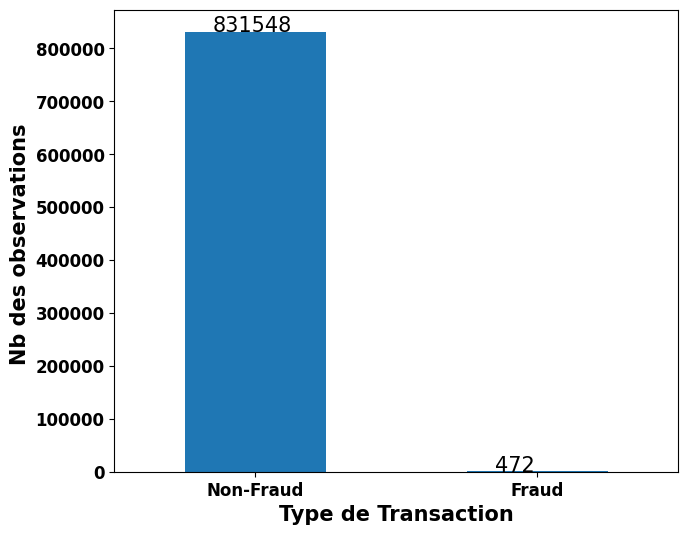

In [ ]:
#Visualisation 


# Fraud non Fraud 
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
df = data.limit(2000000)
pd_df = df.toPandas()
plt.subplots(1,1, figsize=(16,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = pd_df['isFraud'].value_counts().plot(kind='bar')
plt.xlabel('Type de Transaction', fontsize=15, fontweight='bold')
plt.xticks(ticks=[0,1], labels=['Non-Fraud','Fraud'], rotation=0, fontsize=12, fontweight='bold')
plt.ylabel('Nb des observations ', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

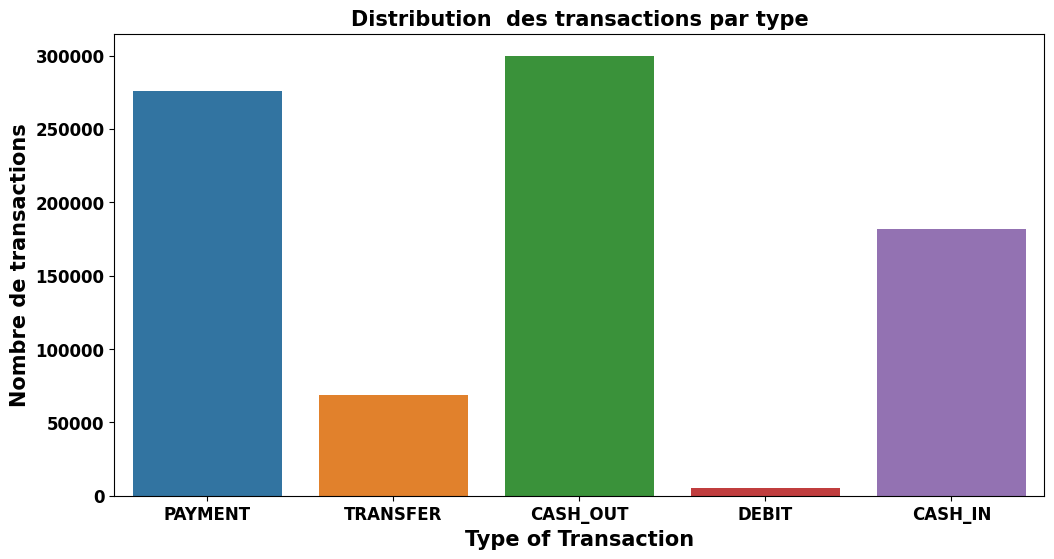

In [ ]:
#Visualisation de type de transactions 
import seaborn as sns
plt.subplots(figsize=(12,6))
sns.countplot(x='type', data=pd_df)
plt.xlabel('Type of Transaction', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('Nombre de transactions', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Distribution  des transactions par type', fontsize=15, fontweight='bold')
plt.show()

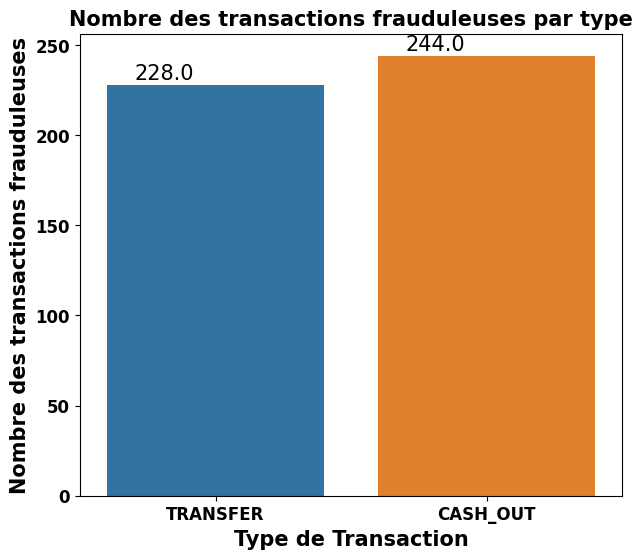

In [ ]:
#visualisation de type de transaction selon les transactions frauduleuses 
plt.subplots(figsize=(7,6))
fr_df = pd_df[pd_df['isFraud'] == 1]
ax =sns.countplot(x='type', data=fr_df)
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')
plt.xlabel('Type de Transaction', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('Nombre des transactions frauduleuses', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Nombre des transactions frauduleuses par type', fontsize=15, fontweight='bold')
plt.show()

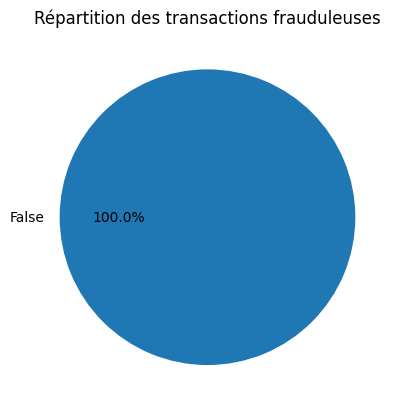

In [ ]:
#isFlaggedFraud Visualisation
from pyspark.sql.functions import col


fraud_counts = data.groupBy("isFlaggedFraud").count().collect()
fraud_labels = [str(row["isFlaggedFraud"]) for row in fraud_counts]
fraud_values = [int(row["count"]) for row in fraud_counts]

# Créez le graphique pie
plt.pie(fraud_values, labels=fraud_labels, autopct='%1.1f%%')

# Ajouter le titre et afficher le graphique
plt.title("Répartition des transactions frauduleuses")
plt.show()




<ipython-input-23-bd63039a2b05>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_sample_corr = pd_df.corr()


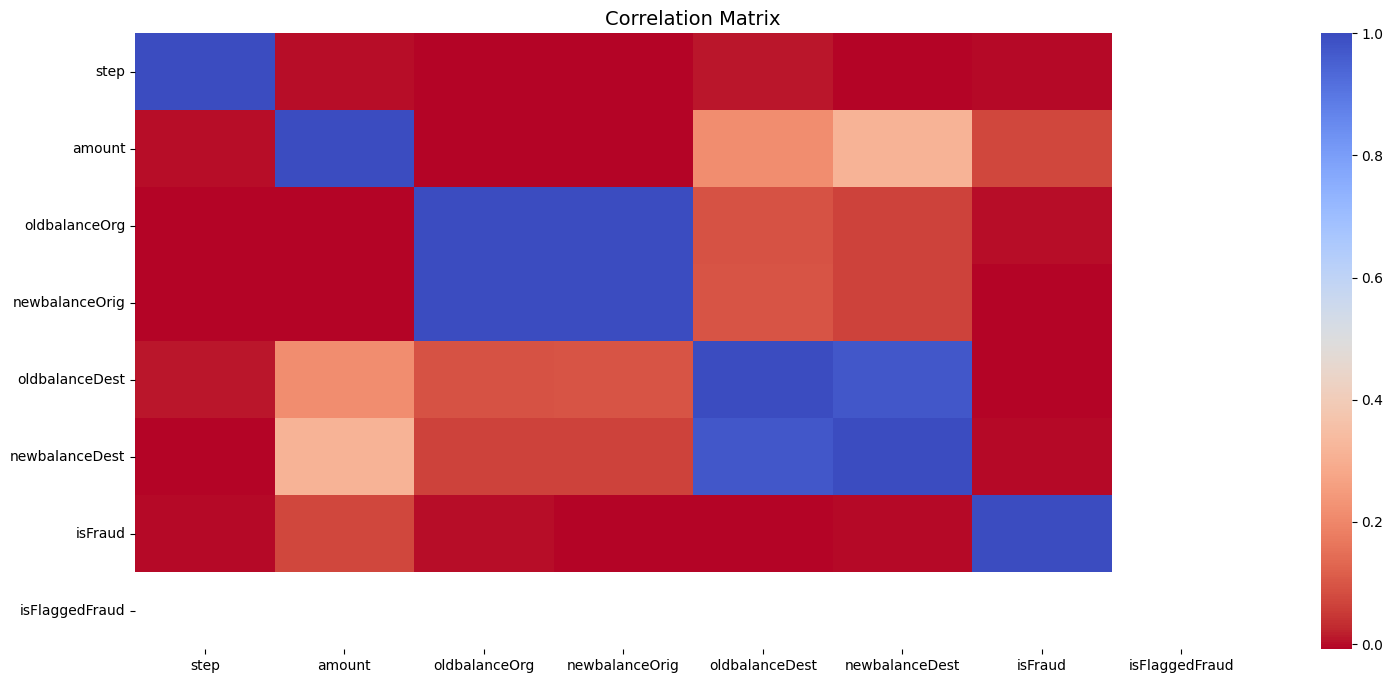

In [ ]:
# Matrice de corrélation corrélation 

f, ax = plt.subplots(figsize=(18,8))

sub_sample_corr = pd_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=14)
plt.show()

In [ ]:
#Pour les colonnes  : nameDest et nameOrig

#leurs valeurs sont similiares s'où le meme traitement sera appliqué sur les deux colonnes 
# la première opération à effectuer est la suppression du premier caractère 
# puis diviser la valeurs en deux colonnes une pour le premier caractère et la deuxième sera pour la valeur numérique 

import pyspark.sql.functions as F
data=(data.withColumn('orig',F.substring('nameOrig',1,1))
      .withColumn('n_orig',F.col('nameOrig').substr(F.lit(2),F.length('nameOrig') - F.lit(1)))
     
     )
data = data.drop('nameOrig')

In [ ]:
import pyspark.sql.functions as F
data=(data.withColumn('dest',F.substring('nameDest',1,1))
      .withColumn('n_dest',F.col('nameDest').substr(F.lit(2),F.length('nameDest') - F.lit(1)))
     
     )
data = data.drop('nameDest')

In [ ]:
#maintenant on peut covertir les colonnes possédant des caractères en valeurs numériques 
from pyspark.ml.feature import StringIndexer
indexer2 = StringIndexer(inputCol="dest", outputCol="dest_index")
data = indexer2.fit(data).transform(data)

#

indexer3 = StringIndexer(inputCol="orig", outputCol="orig_index")
data = indexer3.fit(data).transform(data)

In [ ]:
#convertir la variable catégoriale type

indexer = StringIndexer(inputCol="type", outputCol="type_index")

data = indexer.fit(data).transform(data)


In [ ]:
#on supprime les colonnes converti 
data = data.drop('type')

In [ ]:
data.show(3)

+----+-------+-------------+--------------+--------------+--------------+-------+--------------+----+----------+----+----------+----------+----------+----------+
|step| amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|orig|    n_orig|dest|    n_dest|dest_index|orig_index|type_index|
+----+-------+-------------+--------------+--------------+--------------+-------+--------------+----+----------+----+----------+----------+----------+----------+
|   1|9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|         false|   C|1231006815|   M|1979787155|       1.0|       0.0|       1.0|
|   1|1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|         false|   C|1666544295|   M|2044282225|       1.0|       0.0|       1.0|
|   1|  181.0|        181.0|           0.0|           0.0|           0.0|      1|         false|   C|1305486145|   C| 553264065|       0.0|       0.0|       3.0|
+----+-------+-------------+

In [ ]:
#suppression de la colonne "isFlaggedFraud"
data = data.drop('isFlaggedFraud')

In [ ]:
#les nouvelles colonnes qu'on a 
data

DataFrame[step: int, amount: float, oldbalanceOrg: float, newbalanceOrig: float, oldbalanceDest: float, newbalanceDest: float, isFraud: int, orig: string, n_orig: string, dest: string, n_dest: string, dest_index: double, orig_index: double, type_index: double]

In [ ]:
data = data.drop('dest')
data = data.drop('orig')

In [ ]:
data

DataFrame[step: int, amount: float, oldbalanceOrg: float, newbalanceOrig: float, oldbalanceDest: float, newbalanceDest: float, isFraud: int, n_orig: string, n_dest: string, dest_index: double, orig_index: double, type_index: double]

In [ ]:
#convertir la colonne n_orig et n_dest en int 
data = data.withColumn("n_orig", col("n_orig").cast("int"))
data = data.withColumn("n_dest", col("n_orig").cast("int"))

In [ ]:
data

DataFrame[step: int, amount: float, oldbalanceOrg: float, newbalanceOrig: float, oldbalanceDest: float, newbalanceDest: float, isFraud: int, n_orig: int, n_dest: int, dest_index: double, orig_index: double, type_index: double]

In [ ]:
from google.colab import drive
#Télecharger le jeu donnée pour une utilisation ultérieure 
drive.mount('/content/drive')
data.write.csv('/content/drive/MyDrive/data.csv', header=True, mode='overwrite')


Mounted at /content/drive


In [ ]:
from pyspark.sql.functions import corr
#On calcule la corrélation entre la classe cible et toutes les autres colonnes 
corr_value = data.select(corr('amount', 'isFraud')).collect()[0][0]
corr_value_2 = data.select(corr('step', 'isFraud')).collect()[0][0]
corr_value_3 = data.select(corr('oldbalanceOrg', 'isFraud')).collect()[0][0]
corr_value_4 = data.select(corr('newbalanceOrig', 'isFraud')).collect()[0][0]
corr_value_5 = data.select(corr('oldbalanceDest', 'isFraud')).collect()[0][0]
corr_value_6 = data.select(corr('newbalanceDest', 'isFraud')).collect()[0][0]
corr_value_7 = data.select(corr('n_orig', 'isFraud')).collect()[0][0]
corr_value_8 = data.select(corr('n_dest', 'isFraud')).collect()[0][0]
corr_value_9 = data.select(corr('dest_index', 'isFraud')).collect()[0][0]
corr_value_10 = data.select(corr('orig_index', 'isFraud')).collect()[0][0]
corr_value_11 = data.select(corr('type_index', 'isFraud')).collect()[0][0]




print(corr_value)
print(corr_value_2)
print(corr_value_3)
print(corr_value_4)
print(corr_value_5)
print(corr_value_6)
print(corr_value_7)
print(corr_value_9)
print(corr_value_10)
print(corr_value_11)



0.0708304585218119
-0.0012035807109848236
0.0007665852722491848
-0.0068831412564524215
-0.004797929294802491
-0.0006955448685350131
-0.00046708747493611917
-0.016769714229600278
None
0.009805112539780869


In [ ]:
# En se basant sur les corrélations positives nous sélectionnant les features qui infulencent la classe cible
# nous choisissons : amount , type , oldbalanceOrig et newbalanceDest 
df = data['step','amount','oldbalanceOrg','newbalanceDest','type_index','isFraud']

In [ ]:
df.show()


+----+---------+-------------+--------------+----------+-------+
|step|   amount|oldbalanceOrg|newbalanceDest|type_index|isFraud|
+----+---------+-------------+--------------+----------+-------+
|   1|  9839.64|     170136.0|           0.0|       1.0|      0|
|   1|  1864.28|      21249.0|           0.0|       1.0|      0|
|   1|    181.0|        181.0|           0.0|       3.0|      1|
|   1|    181.0|        181.0|           0.0|       0.0|      1|
|   1| 11668.14|      41554.0|           0.0|       1.0|      0|
|   1|  7817.71|      53860.0|           0.0|       1.0|      0|
|   1|  7107.77|     183195.0|           0.0|       1.0|      0|
|   1|  7861.64|    176087.23|           0.0|       1.0|      0|
|   1|  4024.36|       2671.0|           0.0|       1.0|      0|
|   1|  5337.77|      41720.0|      40348.79|       4.0|      0|
|   1|  9644.94|       4465.0|     157982.12|       4.0|      0|
|   1|  3099.97|      20771.0|           0.0|       1.0|      0|
|   1|  2560.74|       50

In [ ]:
#diviser les données avant d'appliquer ma méthode SMOTE 
from sklearn.model_selection import train_test_split
X = df.toPandas().filter(items=['step', 'amount', 'oldbalanceOrg','newbalanceDest','type_index'])
Y = df.toPandas().filter(items=['isFraud'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
X_train.shape

(748818, 5)

In [ ]:
Y_test.shape

(83202, 1)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
#instanciation du SMOTE 
oversample = SMOTE()
#Appliquer la méthode smote sur les données qu'on a divisé 
x_train_res, y_train_res = oversample.fit_resample(X_train, Y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Resampled dataset shape Counter({'isFraud': 1})


In [ ]:
y_train_res

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
3222399,1
3222400,1
3222401,1
3222402,1


In [ ]:
x_train_res

,step,amount,oldbalanceOrg,newbalanceDest,type_index
0,15,1.807546e+04,4.914207e+05,0.000000e+00,1.0
1,12,9.703400e+02,5.571454e+05,0.000000e+00,1.0
2,18,4.369157e+04,1.071000e+03,6.311099e+06,0.0
3,133,7.938980e+03,0.000000e+00,0.000000e+00,1.0
4,18,1.220257e+05,6.097467e+05,2.789391e+05,0.0
...,...,...,...,...,...
3222399,60,2.152074e+04,2.152074e+04,0.000000e+00,3.0
3222400,36,9.404470e+04,6.990041e+03,3.700058e+05,0.0
3222401,60,2.531419e+04,2.531419e+04,1.138790e+06,0.0
3222402,83,1.135968e+05,1.135968e+05,1.135968e+05,0.0


In [ ]:
dataframe_1 = pd.DataFrame(x_train_res,columns=['step','amount','oldbalanceOrg','newbalanceDest','type_index'])
dataframe_2 = pd.DataFrame(y_train_res, columns = ['isFraud'])
# frames = [dataframe_1, dataframe_2]
#concatener les deux données 
result = dataframe_1.combine_first(dataframe_2)

In [ ]:
dff = spark.createDataFrame(result)


In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Binarizer

from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Convert 'isFraud' column to DoubleType
dff = dff.withColumn('isFraud', col('isFraud').cast(DoubleType()))

# Apply Binarizer transformation
binarizer = Binarizer(threshold=0.0, inputCol='isFraud', outputCol='label')
binarizedDF = binarizer.transform(dff)


In [ ]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer, VectorIndexer
# utiliser VectorAssembler pour regrouper les features comme étant un seul vecteur nommé features 
assembler = VectorAssembler(inputCols = ['step','amount','oldbalanceOrg','newbalanceDest','type_index'], outputCol = 'features')
assembled = assembler.transform(binarizedDF)
print(assembled)

DataFrame[amount: double, isFraud: double, newbalanceDest: double, oldbalanceOrg: double, step: bigint, type_index: double, label: double, features: vector]


In [ ]:
#rediviser les données (70% ==> Train et 30% ==> Test)
(trainingData, testData) = assembled.randomSplit([0.7, 0.3], seed=0)
print('Distribution of Ones and Zeros in trainingData is: ', trainingData.groupBy('label').count().take(3))

Distribution of Ones and Zeros in trainingData is:  [Row(label=0.0, count=523537), Row(label=1.0, count=523941)]


In [ ]:
trainingData.count()

1047478

In [ ]:
testData.count()

449324

Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
# Instanciation de l'arbre de décision de profondeur maximale de 25 
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=25, impurity="gini")
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)


In [ ]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
# Accuracy mesure la proportion d'exemples correctement prédits par rapport à l'ensemble total des exemples.

accuracy = evaluator.evaluate(predictions)


In [ ]:
# Ajout les métriques de chaque algorithme pour une comparaison ultérieure 
evaluator.setMetricName("weightedRecall")

# Calculer recall qui est une mesure de la capacité du modèle à identifier tous les exemples positifs (vrais positifs) dans notre jeu de données 
recall = evaluator.evaluate(predictions)
evaluator.setMetricName("f1")
# calculer F1-score ==> Il est calculé en prenant la moyenne harmonique de la précision et du rappel
f1_score = evaluator.evaluate(predictions)
print(accuracy)
print(recall)
print(f1_score)

0.9908840836456544
0.9908840836456543
0.9908838975786006


In [ ]:
metric={}
metric['Decision Tree'] = [accuracy, recall, f1_score]


Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
#Create a Logistic Regression classifier.
logistic = LogisticRegression(labelCol = "label", featuresCol = "features")
# Learn from the training data.
lrModel = logistic.fit(trainingData)

In [ ]:
prediction_LR = lrModel.transform(testData)


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy_LR = evaluator.evaluate(prediction_LR)
print(accuracy_LR)
evaluator.setMetricName("weightedRecall")
recall_LR = evaluator.evaluate(prediction_LR)
evaluator.setMetricName("f1")
f1_score_LR = evaluator.evaluate(prediction_LR)

print(recall_LR)
print(f1_score_LR)

0.7297918651129252
0.7297918651129252
0.7269885687242703


In [ ]:
metric['Logistic Regression'] = [accuracy_LR, recall_LR, f1_score_LR]


SVM

In [ ]:

from pyspark.ml.classification import LinearSVC

In [ ]:
# Create an instance of the LinearSVC classifier
svm = LinearSVC(labelCol="label", featuresCol="features")

# Train the model
svm_model = svm.fit(trainingData)

In [ ]:
prediction_SVM = svm_model.transform(testData)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy_SVM = evaluator.evaluate(prediction_SVM)
print(accuracy_SVM)
evaluator.setMetricName("weightedRecall")
recall_SVM = evaluator.evaluate(prediction_SVM)
evaluator.setMetricName("f1")
f1_score_SVM = evaluator.evaluate(prediction_SVM)

print(recall_SVM)
print(f1_score_SVM)

0.7323534910220687
0.7323534910220687
0.7288758629429777


In [ ]:
metric['SVM'] = [accuracy_SVM, recall_SVM, f1_score_SVM]


**XGBoost**


In [ ]:
pip install sparkxgb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 22.5 MB/s eta 0:00:00
  Created wheel for sparkxgb: filename=sparkxgb-0.1-py3-none-any.whl size=5630 sha256=3956bc22e5eb3fc53962cc74f735d1e728c63e28d4ff09ad7b876908ee594e1f
  Stored in directory: /root/.cache/pip/wheels/b7/0c/a1/786408e13056fabeb8a72134e101b1e142fc95905c7b0e2a71
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767590 sha256=64e519e8498bbaeabde96fdfab3c2d197d9428b1a9f266a513f92beb6343d1a1
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built sparkxgb pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4

In [ ]:
from sparkxgb.xgboost import XGBoostClassifier


In [ ]:
from pyspark.ml.classification import GBTClassifier

# Instancier GBTClassifier en spécifiant le nombre des arbres = 10
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)

# Entrainer le modèle  
gbt_model = gbt.fit(trainingData)

In [ ]:
# prédictions ....
prediction_GBT = gbt_model.transform(testData)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy_GBT = evaluator.evaluate(prediction_GBT)
print(accuracy_GBT)
evaluator.setMetricName("weightedRecall")
recall_GBT = evaluator.evaluate(prediction_GBT)
evaluator.setMetricName("f1")
f1_score_GBT = evaluator.evaluate(prediction_GBT)

print(recall_GBT)
print(f1_score_GBT)

0.9483245942794064
0.9483245942794064
0.9482965158854116


In [ ]:
metric['XGBoost'] = [accuracy_GBT, recall_GBT, f1_score_GBT]


Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes
#Instanciation 
#smoothing : controle le lissage utilisé pour éviter les probabilités nulles lors de l'estimation 
# spécifions le type du modèle qui Bernoulli utilisé dans la classification binaire  
nb = NaiveBayes(labelCol="label", featuresCol="features", smoothing=1.0, modelType="bernoulli")

# train the model
nb_model = nb.fit(trainingData)
prediction_NB = nb_model.transform(testData)
accuracy_NB = evaluator.evaluate(prediction_NB)
print(accuracy_NB)
evaluator.setMetricName("weightedRecall")
recall_NB = evaluator.evaluate(prediction_NB)
evaluator.setMetricName("f1")
f1_score_NB = evaluator.evaluate(prediction_NB)

print(recall_NB)
print(f1_score_NB)


0.6672894561089868
0.6762247287035636
0.6672894561089868


In [ ]:
metric['Naive Bayes'] = [accuracy_NB, recall_NB, f1_score_NB]


Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
rf_model = rf.fit(trainingData)
prediction_RF = rf_model.transform(testData)
accuracy_RF = evaluator.evaluate(prediction_RF)
print(accuracy_RF)
evaluator.setMetricName("weightedRecall")
recall_RF = evaluator.evaluate(prediction_RF)
evaluator.setMetricName("f1")
f1_score_RF = evaluator.evaluate(prediction_RF)
print(recall_RF)
print(f1_score_RF)


0.9004771628926265
0.9008443795568455
0.9004771628926265


In [ ]:
metric['Random Forest'] = [accuracy_RF, recall_RF, f1_score_RF]


In [ ]:
metrics = pd.DataFrame.from_dict(metric, orient='index',
                       columns=['Precision', 'recall', 'F1 Score'])

In [ ]:
metrics

,Precision,recall,F1 Score
Decision Tree,0.990884,0.990884,0.990884
Logistic Regression,0.729792,0.729792,0.726989
SVM,0.732353,0.732353,0.728876
XGBoost,0.948325,0.948325,0.948297
Naive Bayes,0.667289,0.676225,0.667289
Random Forest,0.900477,0.900844,0.900477
